# Data Wrangling - Step 2

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
url ='C:\\Users\\Nader\\Desktop\\Coding Stuff\\Springboard\\Capstone\\Customer Segmentation - Capstone 2\\Customer Segmentation\\Mall_Customers.csv'
df = pd.read_csv(url)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
col_name =df.columns[2]

In [5]:
df = df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'SpendingScore', col_name:'Age'})

In [6]:
Gender = df.sort_values('Gender')
Gender

,CustomerID,Gender,Age,Income,SpendingScore
69,70,Female,32,48,47
96,97,Female,47,60,47
160,161,Female,56,79,35
94,95,Female,32,60,42
93,94,Female,40,60,40
...,...,...,...,...,...
81,82,Male,38,54,55
80,81,Male,57,54,51
77,78,Male,40,54,48
138,139,Male,19,74,10


In [7]:
Age = df.sort_values('Age')
Age

,CustomerID,Gender,Age,Income,SpendingScore
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
...,...,...,...,...,...
90,91,Female,68,59,55
108,109,Male,68,63,43
57,58,Male,69,44,46
70,71,Male,70,49,55


In [8]:
Income = df.sort_values('Income')
Income

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
Spending = df.sort_values('SpendingScore')
Spending

,CustomerID,Gender,Age,Income,SpendingScore
156,157,Male,37,78,1
158,159,Male,34,78,1
8,9,Male,64,19,3
32,33,Male,53,33,4
30,31,Male,60,30,4
...,...,...,...,...,...
167,168,Female,33,86,95
145,146,Male,28,77,97
185,186,Male,30,99,97
19,20,Female,35,23,98


# Exploratory Data Analysis - Step 3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df[df['Gender'] == 'Male'].mean()

CustomerID       104.238636
Age               39.806818
Income            62.227273
SpendingScore     48.511364
dtype: float64

In [12]:
df[df['Gender'] == 'Female'].mean()

CustomerID       97.562500
Age              38.098214
Income           59.250000
SpendingScore    51.526786
dtype: float64

<AxesSubplot:ylabel='Gender'>

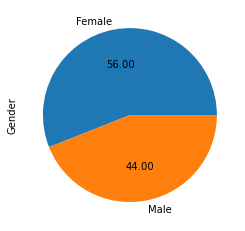

In [13]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

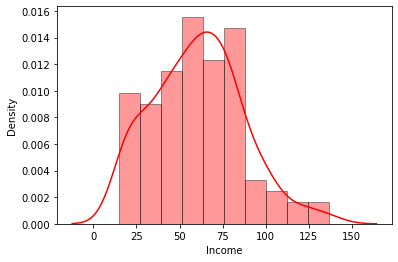

In [14]:
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df.Income, color='red')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

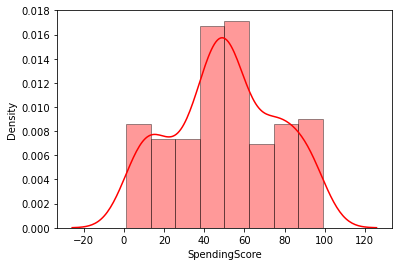

In [15]:
sns.distplot(df.SpendingScore, color='red')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

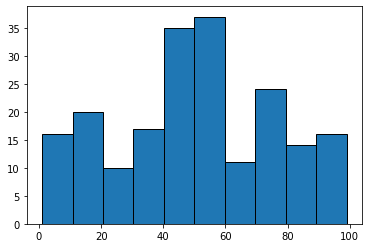

In [16]:
plt.hist(df.SpendingScore)

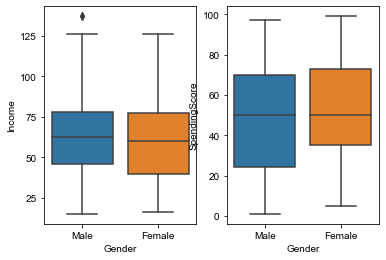

In [17]:
plt.subplot(1,2,1)
sns.boxplot(x=df.Gender, y=df.Income)
plt.subplot(1,2,2)
sns.boxplot(x=df.Gender, y=df.SpendingScore)
plt.rcParams['figure.figsize']=(10,10)
sns.set(font_scale=1.5)

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='SpendingScore'>

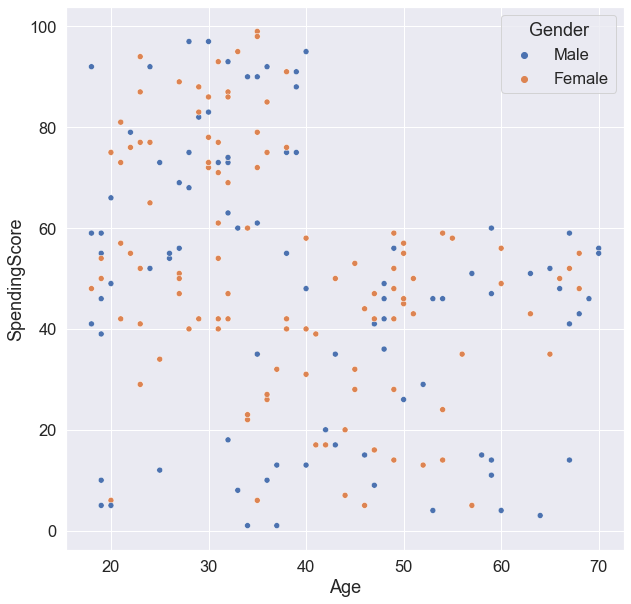

In [18]:
colors = {'Male':'red', 'Female':'blue'}
sns.scatterplot(df.Age, df.SpendingScore, hue=df.Gender)

# Pre-Processing & Training

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [20]:
x = df.drop(['CustomerID', 'SpendingScore', 'Gender'], axis=1)

In [21]:
y = df[['SpendingScore']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Modeling -  Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
pred = regressor.predict(x_test)

In [25]:
import sklearn.metrics as metrics
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

25.0763934368571


# KNN - Regressor - One Hot Encoding

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
#Root mean squared - lower equals better - if it is 2, on average your predictions is +-2, The lower one out of linear and KNN will be the winner
#then implelments gridsearchCV is further enhance for hyperparameters score, (feature importance afterwards - tells you whch predictors came out important to create a story)

In [28]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 23.92321048688909
RMSE value for k=  2 is: 20.434407258347377
RMSE value for k=  3 is: 18.286728642500396
RMSE value for k=  4 is: 18.5161416067171
RMSE value for k=  5 is: 19.445739893354535
RMSE value for k=  6 is: 19.56981803128935
RMSE value for k=  7 is: 20.414210736641277
RMSE value for k=  8 is: 21.013990875128883
RMSE value for k=  9 is: 20.358442298945814
RMSE value for k=  10 is: 20.855939202059446
RMSE value for k=  11 is: 20.90246139960515
RMSE value for k=  12 is: 20.8502231536153
RMSE value for k=  13 is: 20.500391106097428
RMSE value for k=  14 is: 20.97053569527824
RMSE value for k=  15 is: 21.36995814481421
RMSE value for k=  16 is: 21.732334780230126
RMSE value for k=  17 is: 22.505444170267737
RMSE value for k=  18 is: 22.48338206622399
RMSE value for k=  19 is: 23.13046222081341
RMSE value for k=  20 is: 23.25063655042588


# XGBoost 

In [30]:
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import asarray

In [31]:
modelx = XGBRegressor()

In [32]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [33]:
scores = cross_val_score(modelx, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)

C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

In [34]:
scores=absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 18.391 (4.703)


In [35]:
modelx.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
yhat = modelx.predict(x_test)

C:\Users\Nader\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [37]:
for p in yhat:
    print('Predicted:', p)

Predicted: 17.071861
Predicted: 70.364975
Predicted: 54.57885
Predicted: 49.358154
Predicted: 87.2559
Predicted: 25.651667
Predicted: 73.73098
Predicted: 29.637033
Predicted: 19.18757
Predicted: 23.87234
Predicted: 57.32696
Predicted: 57.73807
Predicted: 29.605938
Predicted: 30.07442
Predicted: 52.807983
Predicted: 77.75793
Predicted: 58.080864
Predicted: 29.233185
Predicted: 75.56537
Predicted: 52.807983
Predicted: 87.195175
Predicted: 43.27603
Predicted: 72.88058
Predicted: 78.020035
Predicted: 54.474865
Predicted: 59.779922
Predicted: 66.07059
Predicted: 81.57098
Predicted: 78.00782
Predicted: 38.062244
Predicted: 97.90969
Predicted: 44.05716
Predicted: 30.47386
Predicted: 46.545578
Predicted: 9.668547
Predicted: 60.79125
Predicted: 73.47302
Predicted: 37.873768
Predicted: 45.782043
Predicted: 48.11719
Predicted: 28.203068
Predicted: 46.911507
Predicted: 13.584496
Predicted: 49.295803
Predicted: 51.02339
Predicted: 53.425655
Predicted: 14.258528
Predicted: 54.57984
Predicted: 57.135

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print(rmse)

19.346798078778807


# RANDOM FOREST REGRESSION

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)

<ipython-input-40-b60f3d2e02f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [71]:
y_pred = regressor.predict(x_test)
y_pred

array([12.4       , 60.775     , 53.1       , 47.75      , 63.        ,
       23.2       , 71.3       , 22.75      , 11.85      , 29.98333333,
       53.        , 55.3       , 39.35      , 28.55      , 53.15666667,
       55.65      , 58.65      , 29.15      , 77.25      , 52.515     ,
       73.05      , 59.55      , 73.25      , 79.46666667, 49.6       ,
       45.65      , 55.525     , 75.35      , 46.65      , 38.45      ,
       80.8       , 46.5       , 29.98333333, 44.35      , 19.3       ,
       40.51666667, 72.8       , 65.85      , 50.5       , 49.2       ,
       27.55      , 48.        , 19.9       , 46.3       , 48.04166667,
       49.7       , 13.4       , 52.85      , 56.45      , 69.39      ])

In [ ]:
###### print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# This is the lowest RMSE out of all the Regression models we used!

# K-Means Clustering

Text(0, 0.5, 'WC')

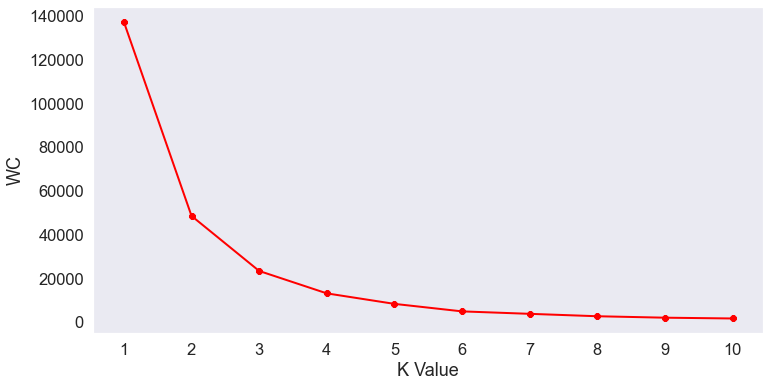

In [62]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker ='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WC')
                    
# Elbow comes in at 5, therefore the optimal K-value is found to be 5

In [ ]:
from pandas import DataFrame
df = DataFrame(df,columns=['SpendingScore','Income'])

[[79.36363636 25.72727273]
 [17.11428571 88.2       ]
 [20.91304348 26.30434783]
 [49.51851852 55.2962963 ]
 [82.12820513 86.53846154]]


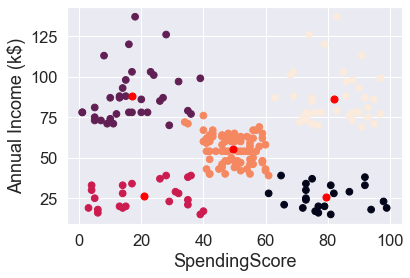

In [100]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['SpendingScore'], df['Income'], c = kmeans.labels_.astype(float), s=45, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("SpendingScore")
plt.ylabel("Annual Income (k$)")
plt.show()

In [46]:
# split into 5 clusters with the following categories
# 1) Low Spending Score, Low Income
# 2) Low Spending Score, High Income
# 3) Average Spending Score, Average Income
# 4) High Spending Score, Low Income
# 5) High Spending Score, High Income

# Gaussian Mixture

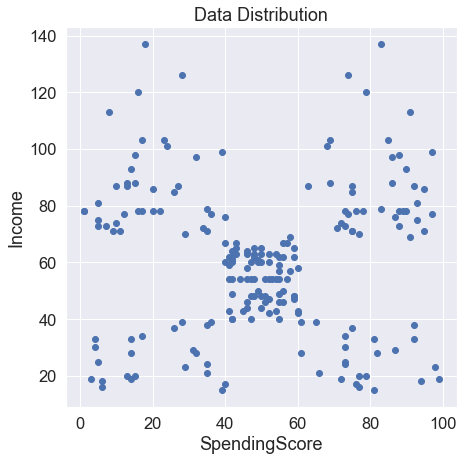

In [47]:
plt.figure(figsize=(7,7))
plt.scatter(df["SpendingScore"],df["Income"])
plt.xlabel('SpendingScore')
plt.ylabel('Income')
plt.title('Data Distribution')
plt.show()

In [48]:
from pandas import DataFrame
from sklearn.mixture import GaussianMixture
df = DataFrame(df,columns=['SpendingScore','Income'])

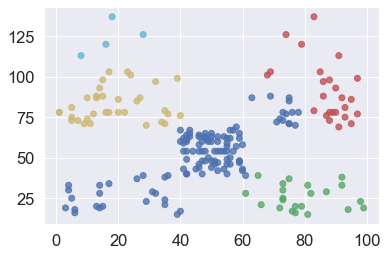

In [49]:
gmm = GaussianMixture(n_components=5, random_state=6)
gmm.fit(df)

colors = ['r' if i==0 else 'b' if i==1 else 'g' if i==2 else 'c' if i ==3 else 'y' for i in gmm.predict(df)]
ax = plt.gca()
ax.scatter(df['SpendingScore'], df['Income'], c=colors, alpha=0.8)
plt.show()

# GRIDSEARCH

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import ensemble

In [51]:
# Select an algorithm
algorithm = RandomForestRegressor()

In [52]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [53]:
g_search = GridSearchCV(estimator = algorithm, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [54]:
g_search.fit(x_train, y_train)

C:\Users\Nader\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [55]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 8}


# Feature Importance

In [56]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

clf = KNeighborsRegressor()

# x is the features
# y is the target variable

n_feats = x.shape[1]

print('Feature  Accuracy')
for i in range(n_feats):
    scores = cross_val_score(clf, x, y, cv=3)
    print(f'{i}        {scores.mean():g}')

Feature  Accuracy
0        -0.0082958
1        -0.0082958


In [57]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(x_train)
	# transform test input data
	X_test_fs = fs.transform(x_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 13.190521
Feature 1: 0.236003


C:\Users\Nader\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [58]:
# This is telling us that Age has the biggest impact on our target variable spending score

# USE SHAP ANALYSIS

In [59]:
import shap
import xgboost

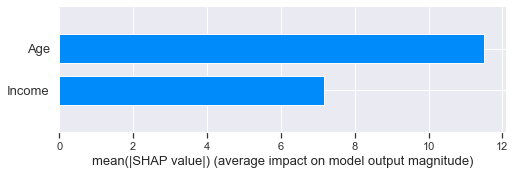

In [60]:
shap_values = shap.TreeExplainer(regressor).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type='bar')
# this plot is showing that Age has more of an impact than Income when it comes to predicting someones SpendingScore